In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


Epoch 0 | Time Taken: 3.59s | Training Error: 47.0174804072, Training loss: 2210.6434638445 | Validation Error: 45.2030833675, Validation loss: 2043.3187459310
Epoch 1 | Time Taken: 2.15s | Training Error: 30.1906557015, Training loss: 911.4756916845 | Validation Error: 22.3288607697, Validation loss: 498.5780232747
Epoch 2 | Time Taken: 2.16s | Training Error: 21.5586183495, Training loss: 464.7740251408 | Validation Error: 22.6217909868, Validation loss: 511.7454274495
Epoch 3 | Time Taken: 2.15s | Training Error: 21.4555677641, Training loss: 460.3413880814 | Validation Error: 22.2998625427, Validation loss: 497.2838694255
Epoch 4 | Time Taken: 2.14s | Training Error: 21.3300939067, Training loss: 454.9729060683 | Validation Error: 21.7137764558, Validation loss: 471.4880879720
Epoch 5 | Time Taken: 2.15s | Training Error: 21.2257421051, Training loss: 450.5321279127 | Validation Error: 22.2247721205, Validation loss: 493.9404958089
Epoch 6 | Time Taken: 2.16s | Training Error: 21.0

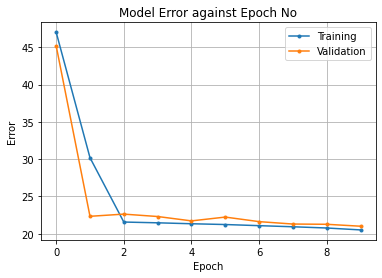

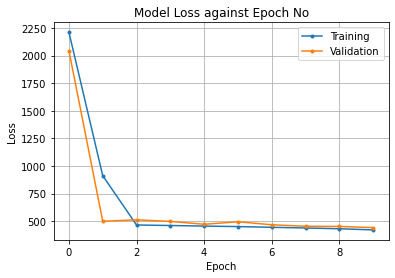

In [3]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution", tempPath='temp/default', mode='default', preCalc=0)
net = exNetClass("netA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, isCuda=1)